<a href="https://colab.research.google.com/github/AshishGtmMishra/ML-SM-projects-and-tutorials/blob/main/Ensemble_Learning_and_Random_Forests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Ensemble Learning and Random Forests using Scikit-Learn**

In this notebook, a comprehensive implementation of Random Forest Classifiers and other ensemble learning techniques has been undertaken, focusing on three distinct datasets: iris, boston housing, and make moons. The code includes detailed explanations for each line, particularly emphasizing visualization codes and other critical components. This notebook is made with educational objectives in mind, providing a robust learning resource for individuals seeking an in-depth understanding of ensemble learning methodologies.

Reference: [Hands-on Machine Learning O'Reilly book](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)

### Setup

In [2]:
import sklearn
import matplotlib.pyplot as plt

plt.rc('font', size = 14)
plt.rc('axes', labelsize = 14, titlesize = 14)
plt.rc('legend', fontsize = 14)
plt.rc('xtick', labelsize = 10)
plt.rc('ytick', labelsize = 10)

In [3]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "ensembles"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

###  Voting Classifiers

In [4]:
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X, y = make_moons(n_samples = 500, noise = 0.30, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

voting_clf = VotingClassifier(
    estimators = [
        ('lr', LogisticRegression(random_state = 42)),
        ('rf', RandomForestClassifier(random_state = 42)),
        ('svc', SVC(random_state = 42))
    ]
)
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [5]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(375, 2)
(125, 2)
(375,)
(125,)


In [6]:
for name, clf in voting_clf.named_estimators_.items():
  print(name, "-", clf.score(X_test, y_test))

lr - 0.864
rf - 0.896
svc - 0.896


In [7]:
type(voting_clf.named_estimators_.items())

dict_items

In [8]:
voting_clf.predict(X_test[:1])

array([1])

In [9]:
[clf.predict(X_test[:1]) for clf in voting_clf.estimators_]

[array([1]), array([1]), array([0])]

In [10]:
voting_clf.score(X_test, y_test)

0.912

In [11]:
voting_clf.voting = "soft"
voting_clf.named_estimators["svc"].probability = True
voting_clf.fit(X_train, y_train)
voting_clf.score(X_test, y_test)

0.92

***We can see that te score improved when we used soft voting.***

### Bagging and Pasting

In [12]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators = 500,
                            max_samples = 100, n_jobs = -1, random_state = 42)
bag_clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1, random_state=42)

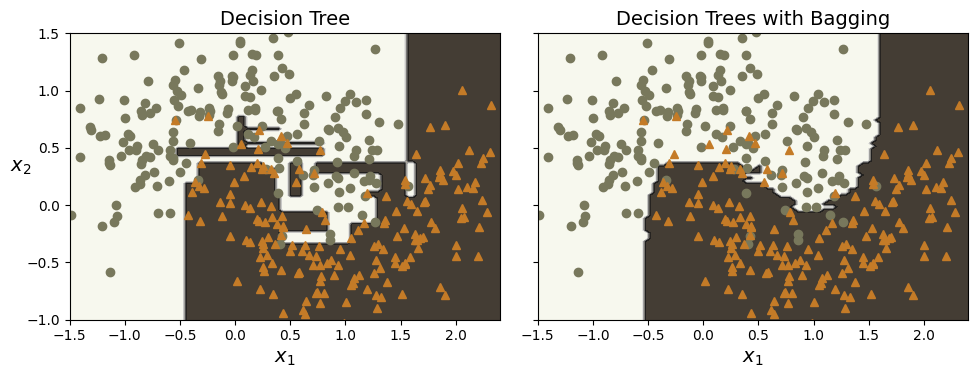

In [13]:
import numpy as np

def plot_decision_boundary(clf, X, y, alpha = 1.0):
  axes = [-1.5, 2.4, -1, 1.5]
  x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 100),
                       np.linspace(axes[2], axes[3], 100))
  X_new = np.c_[x1.ravel(), x2.ravel()]
  y_pred = clf.predict(X_new).reshape(x1.shape)

  plt.contourf(x1, x2, y_pred, alpha = 0.3 * alpha, cmap = 'Wistia')
  plt.contourf(x1, x2, y_pred, cmap = "Greys", alpha = 0.8 * alpha)
  colors = ["#78785c", "#c47b27"]
  markers = ("o", "^")
  for idx in (0, 1):
    plt.plot(X[:, 0][y == idx], X[:, 1][y == idx],
             color = colors[idx], marker = markers[idx], linestyle = "none")
  plt.axis(axes)
  plt.xlabel(r"$x_1$")
  plt.ylabel(r"$x_2$", rotation = 0)

tree_clf = DecisionTreeClassifier(random_state = 42)
tree_clf.fit(X_train, y_train)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf, X_train, y_train)
plt.title("Decision Tree")
plt.sca(axes[1])
plot_decision_boundary(bag_clf, X_train, y_train)
plt.title("Decision Trees with Bagging")
plt.ylabel("")
save_fig("decision_tree_without_and_with_bagging_plot")
plt.show()

- Line 1: Import the numpy library, which provides numerical computing tools for Python.
- Line 3: Define a function named plot_decision_boundary, which takes four parameters: clf, X, y, and alpha. The function is used to plot the decision boundary of a classifier (clf) on a two-dimensional feature space (X) with the corresponding labels (y). The alpha parameter controls the transparency of the plot.
- Line 4: Define a list named axes, which contains the limits of the x and y axes for the plot.
- Line 5: Use the numpy.linspace function to create two arrays of 100 evenly spaced numbers between the first and second elements of axes, and between the third and fourth elements of axes, respectively. These arrays represent the x and y coordinates of the grid points for the plot.
- Line 6: Use the numpy.meshgrid function to create two matrices, x1 and x2, from the arrays created in line 5. These matrices contain the x and y coordinates of the grid points in a rectangular grid.
- Line 7: Use the numpy.c_ function to concatenate the x1 and x2 matrices along the second axis, and then use the numpy.ravel function to flatten the resulting matrix into a one-dimensional array. This array, named X_new, contains the x and y coordinates of the grid points as pairs of values.
- Line 8: Use the clf.predict method to make predictions for the X_new array, and then use the numpy.reshape function to reshape the resulting array into the same shape as x1 and x2 matrices. This array, named y_pred, contains the predicted labels for the grid points.
- Line 10: Use the matplotlib.pyplot.contourf function to plot the filled contours of the y_pred array, using the x1 and x2 matrices as the x and y coordinates, and the alpha and cmap parameters to control the transparency and color map of the plot. This plot shows the regions where the classifier predicts a certain label.
- Line 11: Use the matplotlib.pyplot.contourf function again to plot the filled contours of the y_pred array, using the same x and y coordinates, but with a different color map and transparency. This plot shows the boundaries between the regions where the classifier predicts different labels.
- Line 12: Define a list named colors, which contains two hexadecimal color codes for the plot.
- Line 13: Define a tuple named markers, which contains two symbols for the plot.
- Line 14: Use a for loop to iterate over the indices 0 and 1, which represent the two classes in the y array.
- Line 15: Use the matplotlib.pyplot.plot function to plot the points in the X array that belong to the current class, using the corresponding color and marker from the colors and markers lists, and setting the linestyle parameter to "none". This plot shows the original data points with their labels.
- Line 16: Use the matplotlib.pyplot.axis function to set the limits of the x and y axes to the values in the axes list.
- Line 17: Use the matplotlib.pyplot.xlabel function to set the label of the x axis to the string r"$x_1$", which is a LaTeX expression for the first feature.
- Line 18: Use the matplotlib.pyplot.ylabel function to set the label of the y axis to the string r"$x_2$", which is a LaTeX expression for the second feature, and set the rotation parameter to 0 to prevent the label from being rotated.
- Line 20: Define a variable named tree_clf, which is an instance of the DecisionTreeClassifier class from the sklearn.tree module, and set the random_state parameter to 42 to ensure reproducibility.
- Line 21: Use the tree_clf.fit method to train the decision tree classifier on the X_train and y_train arrays, which are subsets of the original data created by using the train_test_split function from the sklearn.model_selection module.
- Line 23: Define a variable named fig, which is an instance of the Figure class from the matplotlib.pyplot module, and a variable named axes, which is an array of Axes objects from the same module, by using the matplotlib.pyplot.subplots function. The function creates a figure with two subplots arranged in two columns, and sets the figsize parameter to (10, 4) to specify the width and height of the figure in inches, and the sharey parameter to True to make the subplots share the same y axis.
- Line 24: Use the matplotlib.pyplot.sca function to set the current axes to the first element of the axes array, which is the left subplot.
- Line 25: Call the plot_decision_boundary function defined earlier, and pass the tree_clf, X_train, and y_train variables as the arguments, along with the alpha parameter set to 1.0. This plots the decision boundary of the decision tree classifier on the left subplot.
- Line 26: Use the matplotlib.pyplot.title function to set the title of the left subplot to the string "Decision Tree".
- Line 27: Use the matplotlib.pyplot.sca function to set the current axes to the second element of the axes array, which is the right subplot.
- Line 28: Call the plot_decision_boundary function defined earlier, and pass the bag_clf, X_train, and y_train variables as the arguments, along with the alpha parameter set to 1.0. The bag_clf variable is an instance of the BaggingClassifier class from the sklearn.ensemble module, which is an ensemble of 500 decision tree classifiers trained on random subsets of the data, as defined earlier in the web page. This plots the decision boundary of the bagging classifier on the right subplot.
- Line 29: Use the matplotlib.pyplot.title function to set the title of the right subplot to the string "Decision Trees with Bagging".
- Line 30: Use the matplotlib.pyplot.ylabel function to set the label of the y axis of the right subplot to an empty string, to avoid repeating the same label as the left subplot.
- Line 31: Call the save_fig function defined earlier in the web page, and pass the string "decision_tree_without_and_with_bagging_plot" as the argument. The function saves the figure to a file with the specified name and format in the IMAGES_PATH directory, which is also defined earlier in the web page.
- Line 32: Use the matplotlib.pyplot.show function to display the figure on the screen.


### Out-of-Bag Evaluation

In [14]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators = 500,
                            oob_score = True, n_jobs = -1, random_state = 42)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.896

In [15]:
bag_clf.oob_decision_function_[:3]   # Probas for the first 3 instances

array([[0.32352941, 0.67647059],
       [0.3375    , 0.6625    ],
       [1.        , 0.        ]])

In [16]:
from sklearn.metrics import accuracy_score

y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.92

### Random Forests

In [17]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators = 500, max_leaf_nodes = 16,
                                 n_jobs = -1, random_state = 42)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

In [18]:
# Random forest is equivalent to the bag of decision trees
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(max_features = "sqrt", max_leaf_nodes = 16),
    n_estimators=500, n_jobs = -1, random_state = 42
)

In [19]:
bag_clf.fit(X_train, y_train)
y_pred_bag = bag_clf.predict(X_test)
np.all(y_pred_bag == y_pred_rf)

True

### Feature Importance

In [20]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame = True)
rnd_clf = RandomForestClassifier(n_estimators = 500, random_state = 42)
rnd_clf.fit(iris.data, iris.target)
for score, name in zip(rnd_clf.feature_importances_, iris.data.columns):
  print(round(score, 2), name)

0.11 sepal length (cm)
0.02 sepal width (cm)
0.44 petal length (cm)
0.42 petal width (cm)


- Line 1: Import the load_iris function from the sklearn.datasets module. This function loads and returns the iris dataset, which is a classic and very easy multi-class classification dataset. The iris dataset contains 150 samples of three different species of iris flowers (setosa, versicolor, and virginica), with four features each: sepal length, sepal width, petal length, and petal width.
- Line 3: Call the load_iris function with the parameter as_frame set to True. This returns a Bunch object, which is a dictionary-like object that contains the data, the target, and other information about the dataset. The data and the target are pandas DataFrames, which are tabular data structures with labeled rows and columns. Assign the returned Bunch object to a variable named iris.
- Line 4: Import the RandomForestClassifier class from the sklearn.ensemble module. This class implements a random forest classifier, which is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.
- Line 5: Create an instance of the RandomForestClassifier class with the parameters n_estimators set to 500 and random_state set to 42. The n_estimators parameter specifies the number of trees in the forest, and the random_state parameter controls the randomness of the bootstrap sampling and the feature selection. Assign the created instance to a variable named rnd_clf.
- Line 6: Call the fit method of the rnd_clf object with the parameters X and y set to iris.data and iris.target, respectively. This method builds a random forest classifier from the training data, which consists of the features (X) and the labels (y) of the iris dataset.
- Line 7: Use a for loop to iterate over the zip object that contains the feature importances and the feature names of the rnd_clf object and the iris.data DataFrame, respectively. The feature importances are an array of numbers that indicate how much each feature contributes to the prediction. The feature names are a list of strings that identify the columns of the DataFrame.
- Line 8: Use the print function to display the rounded score and the name of each feature, separated by a space. The score is a float value between 0 and 1 that represents the relative importance of the feature, and the name is a string that describes the feature. This prints the feature importances and the feature names of the random forest classifier in a tabular format.

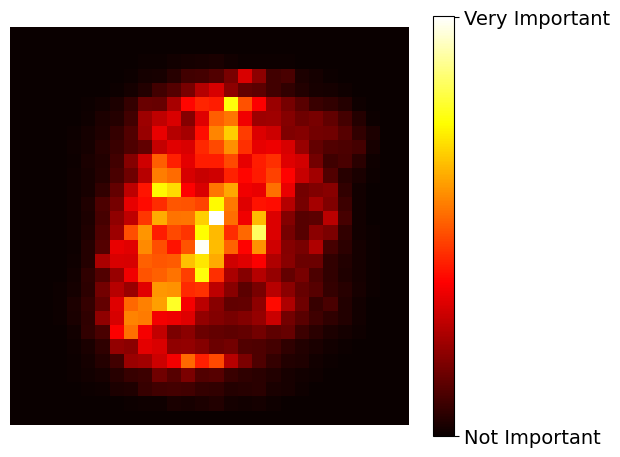

In [21]:
from sklearn.datasets import fetch_openml

X_mnist, y_mnist = fetch_openml('mnist_784', return_X_y= True, as_frame = False,
                                 parser = 'auto')

rnd_clf = RandomForestClassifier(n_estimators=100, random_state = 42)
rnd_clf.fit(X_mnist, y_mnist)

heatmap_image = rnd_clf.feature_importances_.reshape(28, 28)
plt.imshow(heatmap_image, cmap = "hot")
char = plt.colorbar(ticks = [rnd_clf.feature_importances_.min(),
                             rnd_clf.feature_importances_.max()])

char.ax.set_yticklabels(['Not Important', 'Very Important'], fontsize = 14)
plt.axis("off")
save_fig("mnist_feature_importance_plot")
plt.show()

- Line 1: Import the fetch_openml function from the sklearn.datasets module, which allows downloading datasets from the OpenML platform. The web page that is opened is a dataset page from OpenML, which provides information about the MNIST dataset with 784 features.
- Line 3: Use the fetch_openml function to download the MNIST dataset, and return the feature matrix (X_mnist) and the target vector (y_mnist) as numpy arrays. The as_frame parameter is set to False to avoid returning pandas dataframes, the parser parameter is set to 'auto' to automatically infer the data type of each feature, and the version parameter is set to 'active' to get the latest version of the dataset.
- Line 5: Import the RandomForestClassifier class from the sklearn.ensemble module, which implements a random forest algorithm for classification. The web page that is opened also contains a section on voting classifiers, which are a type of ensemble method that combine the predictions of multiple classifiers.
- Line 6: Create an instance of the RandomForestClassifier class, with the n_estimators parameter set to 100, which means that the random forest will consist of 100 decision trees, and the random_state parameter set to 42, which means that the random number generator will be fixed for reproducibility.
- Line 7: Use the fit method of the RandomForestClassifier instance to train the model on the MNIST dataset, using the feature matrix (X_mnist) and the target vector (y_mnist) as inputs.
- Line 9: Use the feature_importances_ attribute of the RandomForestClassifier instance to get an array of the importance scores of each feature (pixel) in the MNIST dataset. The importance score reflects how much the feature contributes to the prediction accuracy of the model. Then use the reshape method of the numpy array to reshape the array into a 28 by 28 matrix, which corresponds to the original shape of the images in the MNIST dataset. Assign the reshaped matrix to a variable named heatmap_image.
- Line 10: Import the matplotlib.pyplot module as plt, which provides plotting functions for Python. The web page that is opened also contains a section on plotting decision boundaries, which uses the matplotlib.pyplot module to create contour plots.
- Line 11: Use the imshow function of the plt module to display the heatmap_image matrix as an image, using the cmap parameter to set the color map to "hot", which means that low values will be mapped to dark colors and high values will be mapped to bright colors.
- Line 12: Use the colorbar function of the plt module to add a color bar to the image, which shows the range of values in the heatmap_image matrix. Use the ticks parameter to set the ticks on the color bar to the minimum and maximum values of the feature importance scores, which are obtained from the feature_importances_ attribute of the RandomForestClassifier instance.
- Line 13: Use the set_yticklabels method of the color bar object to set the labels of the ticks on the color bar to 'Not Important' and 'Very Important', which indicate the relative importance of the features (pixels) in the MNIST dataset. Use the fontsize parameter to set the font size of the labels to 14.
- Line 14: Use the axis function of the plt module to turn off the display of the x and y axes of the image, which are not relevant for the heatmap.
- Line 15: Use the save_fig function defined in the web page that is opened to save the image to a file named "mnist_feature_importance_plot, using the fig_extension parameter to set the file format to "png" and the resolution parameter to set the resolution to 300 dots per inch
- Line 16: Use the show function of the plt module to display the image on the screen. The image shows the feature importance of each pixel in the MNIST dataset, with brighter colors indicating more important pixels and darker colors indicating less important pixels. The image can help to understand which parts of the images are more relevant for the random forest classifier to make accurate predictions.


### Boosting

#### AdaBoost

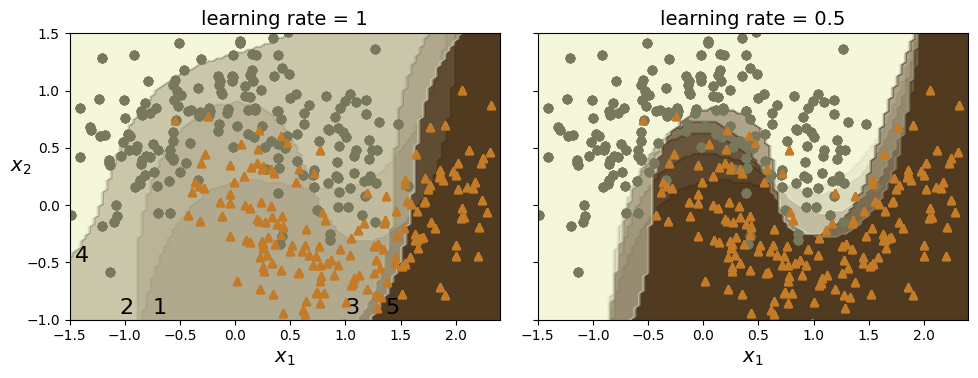

In [22]:
m = len(X_train)

fig, axes = plt.subplots(ncols = 2, figsize= (10, 4), sharey = True)
for subplot, learning_rate in ((0, 1), (1, 0.5)):
  sample_weights = np.ones(m) / m
  plt.sca(axes[subplot])
  for i in range(5):
    svm_clf = SVC(C = 0.2, gamma = 0.6, random_state = 42)
    svm_clf.fit(X_train, y_train, sample_weight = sample_weights * m)
    y_pred =  svm_clf.predict(X_train)

    error_weights = sample_weights[y_pred != y_train].sum()
    r = error_weights / sample_weights.sum()
    alpha = learning_rate * np.log((1 - r) / r)
    sample_weights[y_pred != y_train] *= np.exp(alpha)
    sample_weights /= sample_weights.sum()

    plot_decision_boundary(svm_clf, X_train, y_train, alpha = 0.4)
    plt.title(f"learning rate = {learning_rate}")
  if subplot == 0:
      plt.text(-0.75, -0.95, "1", fontsize=16)
      plt.text(-1.05, -0.95, "2", fontsize=16)
      plt.text(1.0, -0.95, "3", fontsize=16)
      plt.text(-1.45, -0.5, "4", fontsize=16)
      plt.text(1.36,  -0.95, "5", fontsize=16)
  else:
      plt.ylabel("")

save_fig("boosting_plot")
plt.show()

- Line 1: Assign the length of the X_train array to the variable m. This is the number of training instances.
- Line 3: Create a figure with two subplots, arranged horizontally, with a shared y-axis and a size of 10 by 4 inches. Assign the subplot objects to the axes variable.
- Line 4: Use a for loop to iterate over two pairs of values: (0, 1) and (1, 0.5). The first value in each pair is the index of the subplot, and the second value is the learning rate for the boosting algorithm.
- Line 5: Create an array of sample weights, initialized to 1/m for each training instance. This means that each instance has the same initial weight.
- Line 6: Use the matplotlib.pyplot.sca function to set the current subplot to the one specified by the subplot variable.
- Line 7: Use another for loop to iterate over five iterations, corresponding to the number of weak learners to be trained.
- Line 8: Create an SVM classifier object with a C parameter of 0.2, a gamma parameter of 0.6, and a random state of 42. These are the hyperparameters that control the complexity and regularization of the SVM model.
- Line 9: Fit the SVM classifier to the X_train and y_train arrays, using the sample weights multiplied by m as the sample_weight parameter. This means that the SVM classifier will try to fit the data according to the assigned weights of each instance.
- Line 10: Use the SVM classifier to make predictions on the X_train array, and assign the result to the y_pred variable.
- Line 11: Calculate the sum of the sample weights for the instances that are incorrectly classified by the SVM classifier, and assign the result to the error_weights variable.
- Line 12: Calculate the ratio of the error_weights to the sum of the sample weights, and assign the result to the r variable. This is the error rate of the SVM classifier on the weighted training set.
- Line 13: Calculate the alpha value for the SVM classifier, which is the learning rate multiplied by the natural logarithm of (1 - r) / r. This is the weight of the SVM classifier in the final ensemble.
- Line 14: Update the sample weights for the instances that are incorrectly classified by the SVM classifier, by multiplying them by the exponential of the alpha value. This means that the misclassified instances will have higher weights in the next iteration.
- Line 15: Normalize the sample weights by dividing them by their sum. This ensures that the sum of the sample weights is always equal to 1.
- Line 17: Use the plot_decision_boundary function, defined earlier in the web page, to plot the decision boundary of the SVM classifier on the X_train and y_train arrays, using the alpha value as the alpha parameter. This function also plots the original data points with their labels. The alpha parameter controls the transparency of the plot, so that the decision boundaries of the previous SVM classifiers can be seen as well.
- Line 18: Use the matplotlib.pyplot.title function to set the title of the subplot to the learning rate value.
- Line 19: Use an if statement to check if the subplot index is 0, which means it is the first subplot.
- Line 20-24: Use the matplotlib.pyplot.text function to add some text annotations to the subplot, indicating the order of the SVM classifiers trained in each iteration. For example, the text "1" means that the SVM classifier with the lowest alpha value (and the highest error rate) was trained first, and the text "5" means that the SVM classifier with the highest alpha value (and the lowest error rate) was trained last.
- Line 25: Use an else statement to handle the case when the subplot index is not 0, which means it is the second subplot.
- Line 26: Use the matplotlib.pyplot.ylabel function to set the label of the y axis to an empty string. This is because the y axis is shared by both subplots, and the label is already set by the first subplot.
- Line 28: Use the save_fig function, defined earlier in the web page, to save the figure as an image file with the name "boosting_plot".
- Line 29: Use the matplotlib.pyplot.show function to display the figure on the screen. The figure shows the decision boundaries of the five SVM classifiers trained in each subplot, with different learning rates. The decision boundaries are color-coded by the alpha values, with darker colors indicating higher alpha values (and lower error rates). The data points are also color-coded by their labels, with yellow circles indicating positive instances and purple triangles indicating negative instances. The text annotations show the order of the SVM classifiers trained in each iteration.


In [23]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth = 1), n_estimators=30,
    learning_rate = 0.5, random_state = 42
)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=30, random_state=42)

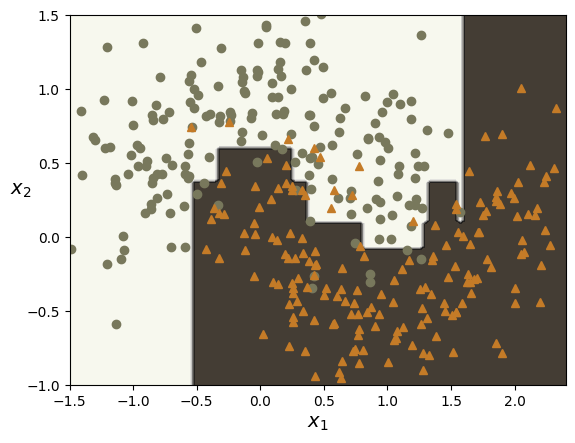

In [24]:
plot_decision_boundary(ada_clf, X_train, y_train)

#### Gradient Boosting

In [25]:
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3 * X[:, 0] ** 2 + 0.05 * np.random.randn(100)

tree_reg1 = DecisionTreeRegressor(max_depth = 2, random_state = 42)
tree_reg1.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [26]:
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth = 2, random_state = 43)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(max_depth=2, random_state=43)

In [27]:
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth = 2, random_state = 44)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(max_depth=2, random_state=44)

In [28]:
X_new = np.array([[-0.4], [0.], [0.5]])
sum (tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))

array([0.49484029, 0.04021166, 0.75026781])

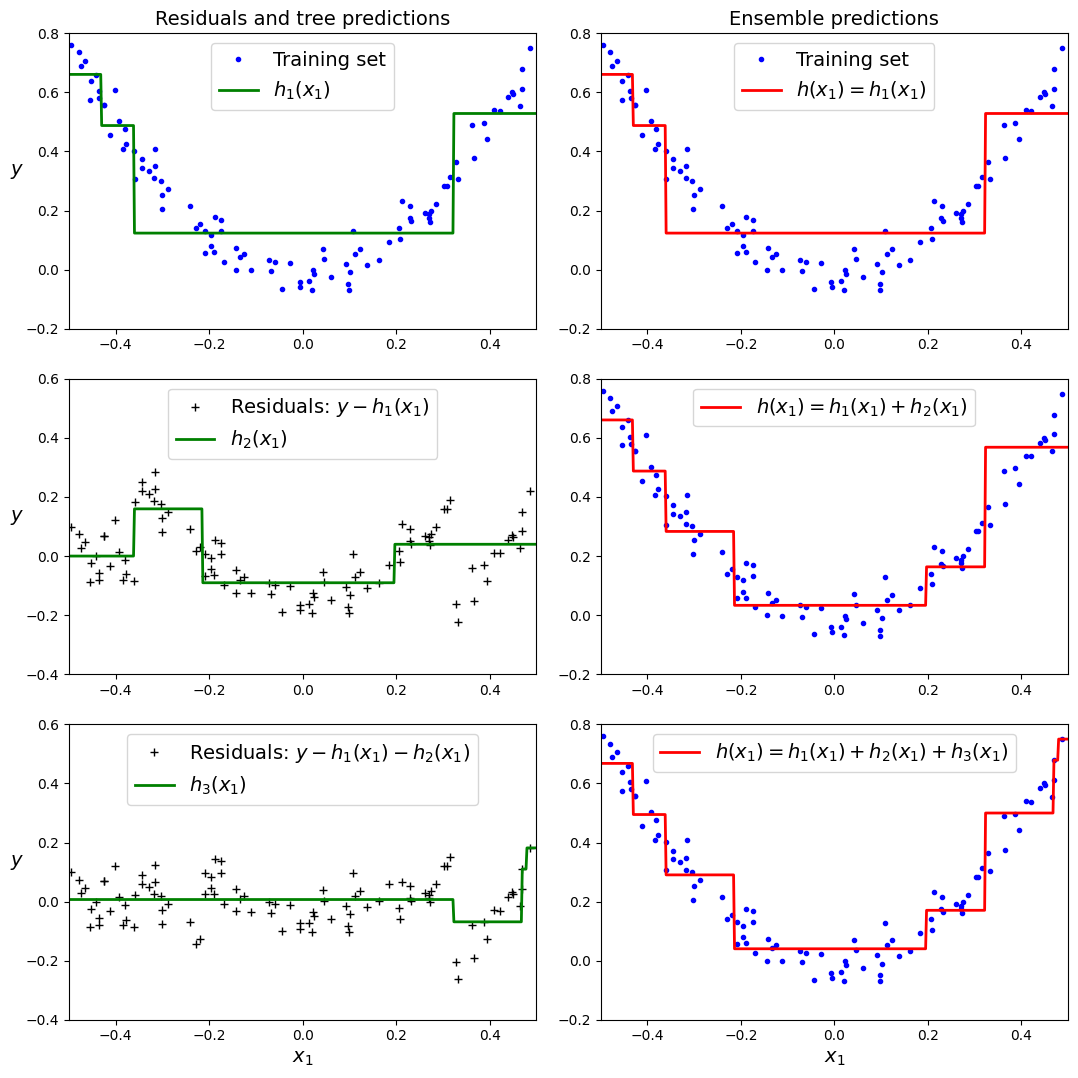

In [29]:
def plot_predictions(regressors, X, y, axes, style,
                     label=None, data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1))
                 for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center")
    plt.axis(axes)

plt.figure(figsize=(11, 11))

plt.subplot(3, 2, 1)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.2, 0.8], style="g-",
                 label="$h_1(x_1)$", data_label="Training set")
plt.ylabel("$y$  ", rotation=0)
plt.title("Residuals and tree predictions")

plt.subplot(3, 2, 2)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.2, 0.8], style="r-",
                 label="$h(x_1) = h_1(x_1)$", data_label="Training set")
plt.title("Ensemble predictions")

plt.subplot(3, 2, 3)
plot_predictions([tree_reg2], X, y2, axes=[-0.5, 0.5, -0.4, 0.6], style="g-",
                 label="$h_2(x_1)$", data_style="k+",
                 data_label="Residuals: $y - h_1(x_1)$")
plt.ylabel("$y$  ", rotation=0)

plt.subplot(3, 2, 4)
plot_predictions([tree_reg1, tree_reg2], X, y, axes=[-0.5, 0.5, -0.2, 0.8],
                  style="r-", label="$h(x_1) = h_1(x_1) + h_2(x_1)$")

plt.subplot(3, 2, 5)
plot_predictions([tree_reg3], X, y3, axes=[-0.5, 0.5, -0.4, 0.6], style="g-",
                 label="$h_3(x_1)$", data_style="k+",
                 data_label="Residuals: $y - h_1(x_1) - h_2(x_1)$")
plt.xlabel("$x_1$")
plt.ylabel("$y$  ", rotation=0)

plt.subplot(3, 2, 6)
plot_predictions([tree_reg1, tree_reg2, tree_reg3], X, y,
                 axes=[-0.5, 0.5, -0.2, 0.8], style="r-",
                 label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1$")

save_fig("gradient_boosting_plot")
plt.show()

In [30]:
# Performing GBRT using the GradientBoostingRegressor

from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth = 2, n_estimators = 3,
                                 learning_rate = 1.0, random_state = 42)
gbrt.fit(X, y)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3,
                          random_state=42)

In [31]:
gbrt_best = GradientBoostingRegressor(
    max_depth = 2, learning_rate = 0.05, n_estimators = 500,
    n_iter_no_change = 10, random_state = 42
)
gbrt_best.fit(X, y)

GradientBoostingRegressor(learning_rate=0.05, max_depth=2, n_estimators=500,
                          n_iter_no_change=10, random_state=42)

In [32]:
# Finding the best estimators
gbrt_best.n_estimators_

92

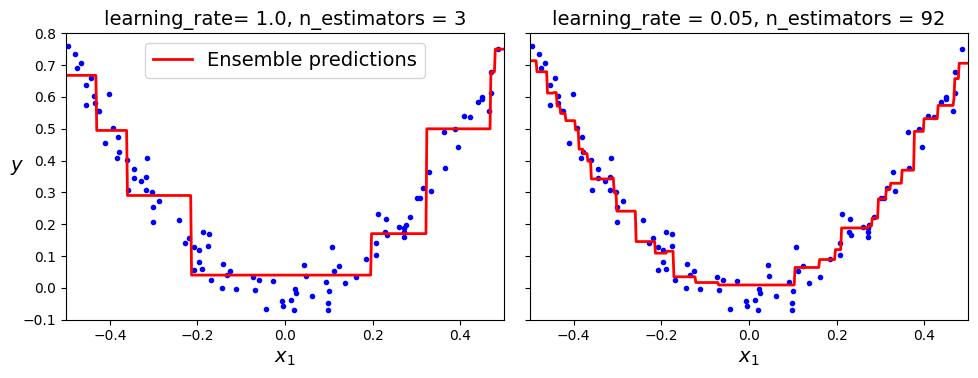

In [33]:
fig, axes = plt.subplots(ncols = 2, figsize= (10, 4), sharey = True)

plt.sca(axes[0])
plot_predictions([gbrt], X, y, axes = [-0.5, 0.5, -0.1, 0.8], style = "r-",
                 label = "Ensemble predictions")
plt.title(f"learning_rate= {gbrt.learning_rate}, "
          f"n_estimators = {gbrt.n_estimators}")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation = 0)

plt.sca(axes[1])
plot_predictions([gbrt_best], X, y, axes = [-0.5, 0.5, -0.1, 0.8], style = "r-")
plt.title(f"learning_rate = {gbrt_best.learning_rate}, "
          f"n_estimators = {gbrt_best.n_estimators_}")
plt.xlabel("$x_1$")

save_fig("gbrt_learning_rate_plot")
plt.show()

- Line 1: Use the matplotlib.pyplot.subplots function to create a figure and two subplots, arranged horizontally (ncols = 2), with a fixed size (figsize = (10, 4)) and a shared y-axis (sharey = True). Assign the figure object to the variable fig and the array of subplot axes to the variable axes.
- Line 3: Use the matplotlib.pyplot.sca function to set the current axes to the first subplot (axes[0]).
- Line 4: Call the plot_predictions function, which is defined earlier in the web page, to plot the predictions of the gbrt model, which is a GradientBoostingRegressor object with a learning rate of 0.1 and 3 estimators. Pass the following arguments to the function:
    - [gbrt]: a list containing the gbrt model
    - X: the feature array of the dataset
    - y: the target array of the dataset
    - axes: a list of four numbers specifying the limits of the x and y axes for the plot
    - style: a string indicating the color and style of the prediction line
    - label: a string indicating the label of the prediction line
- Line 5: Use the matplotlib.pyplot.title function to set the title of the first subplot, using the f-string syntax to insert the values of the gbrt.learning_rate and gbrt.n_estimators attributes.
- Line 6: Use the matplotlib.pyplot.xlabel function to set the label of the x-axis to the string "$x_1$", which is a LaTeX expression for the first feature.
- Line 7: Use the matplotlib.pyplot.ylabel function to set the label of the y-axis to the string "$y$", which is a LaTeX expression for the target, and set the rotation parameter to 0 to prevent the label from being rotated.
- Line 9: Use the matplotlib.pyplot.sca function to set the current axes to the second subplot (axes[1]).
- Line 10: Call the plot_predictions function again, but this time with the gbrt_best model, which is a GradientBoostingRegressor object with a learning rate of 0.1 and 2 estimators. Pass the same arguments as before, except for the label, which is not needed since there is only one prediction line in the second subplot.
- Line 11: Use the matplotlib.pyplot.title function to set the title of the second subplot, using the f-string syntax to insert the values of the gbrt_best.learning_rate and gbrt_best.n_estimators_ attributes. Note that the latter is an underscored attribute that indicates the actual number of estimators used by the model, which may be different from the n_estimators parameter if early stopping is enabled.
- Line 12: Use the matplotlib.pyplot.xlabel function to set the label of the x-axis to the same string as before.
- Line 14: Call the save_fig function, which is defined earlier in the web page, to save the figure to a file named "gbrt_learning_rate_plot.png" in the "images/ensembles" folder. This function also applies some formatting options to the figure, such as tight_layout and dpi.
- Line 15: Use the matplotlib.pyplot.show function to display the figure on the screen.


In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
housing_labels = train_set["median_house_value"]
housing = train_set.drop("median_house_value", axis=1)

In [35]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.preprocessing import OrdinalEncoder

hgb_reg = make_pipeline(
    make_column_transformer((OrdinalEncoder(), ["ocean_proximity"]),
                            remainder = "passthrough"),
    HistGradientBoostingRegressor(categorical_features = [0], random_state = 42)
)
hgb_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['ocean_proximity'])])),
                ('histgradientboostingregressor',
                 HistGradientBoostingRegressor(categorical_features=[0],
                                               random_state=42))])

- Line 1: Import the make_pipeline function from the sklearn.pipeline module. This function is used to create a pipeline of estimators that can be applied sequentially to the data.
- Line 2: Import the make_column_transformer function from the sklearn.compose module. This function is used to create a column transformer that can apply different transformations to different columns of the data.
- Line 3: Import the HistGradientBoostingRegressor class from the sklearn.ensemble module. This class is used to create a histogram-based gradient boosting regression model, which is a fast and scalable variant of gradient boosting.
- Line 4: Import the OrdinalEncoder class from the sklearn.preprocessing module. This class is used to encode categorical features as ordinal integers.
- Line 6: Create a pipeline object named hgb_reg, which consists of two steps:
    - The first step is a column transformer, which takes two arguments:
        - The first argument is a list of tuples, each specifying a transformer and the columns to apply it to. In this case, there is only one tuple, which applies the OrdinalEncoder to the column "ocean_proximity", which is a categorical feature in the housing dataset. The OrdinalEncoder will convert the values in this column to integers from 0 to n_categories - 1, where n_categories is the number of unique values in the column.
        - The second argument is the remainder parameter, which specifies what to do with the columns that are not transformed by the column transformer. In this case, the value is "passthrough", which means that the remaining columns will be passed through unchanged.
    - The second step is a histogram-based gradient boosting regression model, which takes two arguments:
        - The first argument is the categorical_features parameter, which specifies the indices of the categorical features in the input data. In this case, the value is [0], which means that the first column (after the column transformer) is a categorical feature. This information is used by the model to handle missing values and split points for the categorical features.
        - The second argument is the random_state parameter, which specifies the seed for the random number generator. This is used to ensure reproducibility of the results. In this case, the value is 42, which is a common choice for testing purposes.
- Line 7: Fit the pipeline object to the housing data and the housing labels, which are the features and the target values for the regression task. This will fit the column transformer and the histogram-based gradient boosting model to the data, and store the fitted parameters in the pipeline object.


In [36]:
from sklearn.model_selection import cross_val_score

hgb_rmses = -cross_val_score(hgb_reg, housing, housing_labels,
                             scoring = "neg_root_mean_squared_error", cv = 10)
pd.Series(hgb_rmses).describe()

count       10.000000
mean     47613.307194
std       1295.422509
min      44963.213061
25%      47001.233485
50%      48000.963564
75%      48488.093243
max      49176.368465
dtype: float64

### Stacking

In [42]:
from sklearn.ensemble import StackingClassifier

stacking_clf = StackingClassifier(
    estimators = [
        ('lr', LogisticRegression(random_state = 42)),
        ('rf', RandomForestClassifier(random_state = 42)),
        ('svc', SVC(probability  = True, random_state = 42))
    ],
    final_estimator = RandomForestClassifier(random_state = 43),
    cv = 5
)

stacking_clf.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('lr', LogisticRegression(random_state=42)),
                               ('rf', RandomForestClassifier(random_state=42)),
                               ('svc', SVC(probability=True, random_state=42))],
                   final_estimator=RandomForestClassifier(random_state=43))

- Line 1: Import the StackingClassifier class from the sklearn.ensemble module.

- Line 3: Define a StackingClassifier object named stacking_clf, which is an ensemble learning method that combines multiple classification models (LogisticRegression, RandomForestClassifier, and SVC) to improve the accuracy of the predictions. The final_estimator parameter specifies the model used to aggregate the predictions of the base models, which is another RandomForestClassifier in this case. The cv parameter specifies the number of cross-validation folds to use for training the models.

- Line 5: Use the fit method of the stacking_clf object to train the model on the training data (X_train and y_train).


In [43]:
stacking_clf.score(X_test, y_test)

0.928